In [2]:
# import modules
import pandas as pd
pd.set_option('display.max_columns', 20)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data
df = pd.read_csv("Churn_Modelling.csv")
display(df)


# Wyłączenie notacji naukowej dla liczb zmiennoprzecinkowych
#pd.options.display.float_format = '{:,.0f}'.format
pd.reset_option('display.float_format')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#delete unnecessary column
df = df.drop('RowNumber', axis=1)

In [4]:
#check for datatypes
display(df.dtypes)

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# List of columns to be converted to 'category' type

category_columns = ['Geography',
                    'Gender',
                    'HasCrCard',
                    'IsActiveMember',
                    'Exited']

# Convert each column to 'category' type
for column in category_columns:
    df[column] = df[column].astype('category')

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


<Figure size 1000x600 with 0 Axes>

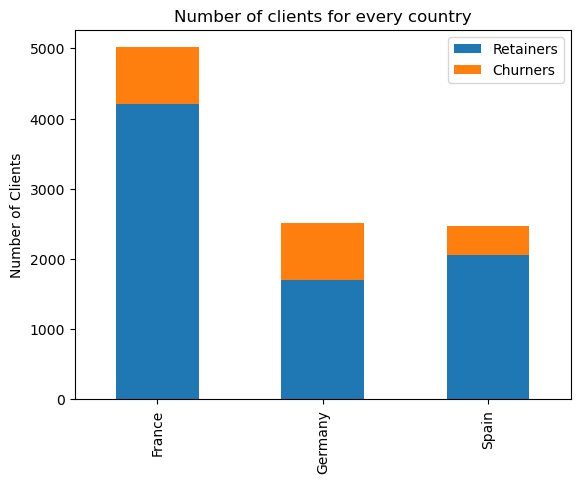

Exited,0,1
Geography,,
France,83.85%,16.15%
Germany,67.56%,32.44%
Spain,83.33%,16.67%


<Figure size 1000x600 with 0 Axes>

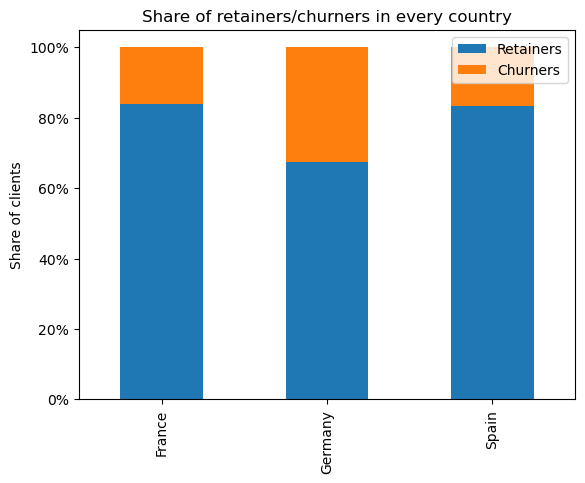

In [6]:
# analizing Geography
from matplotlib.ticker import PercentFormatter

# creating crosstab
Geography_crosstab = pd.crosstab(df['Geography'], df['Exited'])
display(Geography_crosstab)
# moves the index (Geography) to a column and resets the index to default integers
Geography_crosstab = Geography_crosstab.reset_index()

# bar plot
plt.figure(figsize=(10, 6))
Geography_crosstab.plot(kind='bar', x='Geography', stacked=True, ) #
plt.title('Number of clients for every country')
plt.xlabel('')
plt.ylabel('Number of Clients')
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

#####################################################

# creating crosstab with normalization
Geography_crosstab = pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100
display(Geography_crosstab.round(2).astype(str) + '%')
# moves the index (Geography) to a column and resets the index to default integers
Geography_crosstab = pd.crosstab(df['Geography'], df['Exited'], normalize='index')
Geography_crosstab = Geography_crosstab.reset_index()

# bar plot of normalized values
plt.figure(figsize=(10, 6))
ax = Geography_crosstab.plot(kind='bar', x='Geography', stacked=True)
plt.title('Share of retainers/churners in every country')
plt.xlabel('')
plt.ylabel('Share of clients')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


<Figure size 1000x600 with 0 Axes>

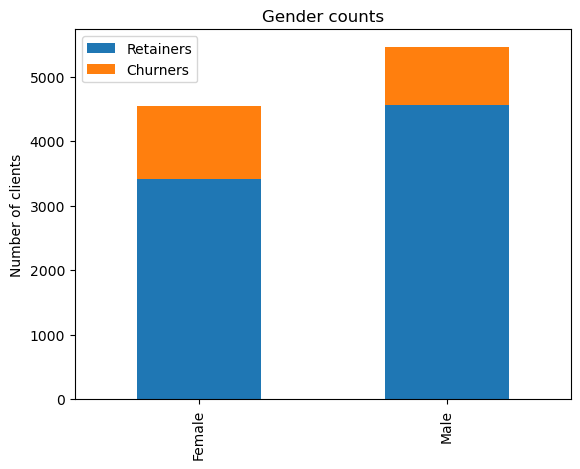

Exited,0,1
Gender,,
Female,74.93%,25.07%
Male,83.54%,16.46%


<Figure size 1000x600 with 0 Axes>

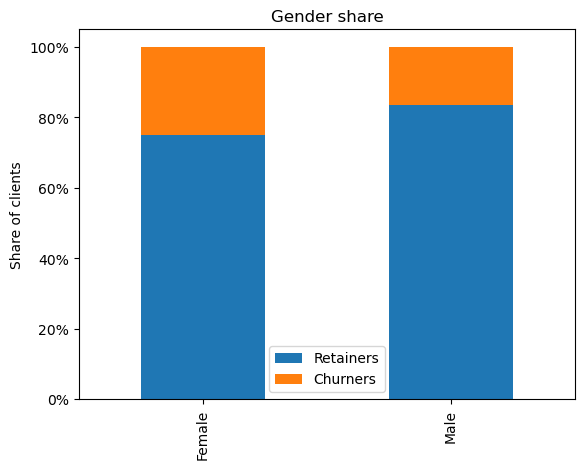

In [7]:
# analizing Gender
from matplotlib.ticker import PercentFormatter

# creating crosstab
Gender_crosstab = pd.crosstab(df['Gender'], df['Exited'])
display(Gender_crosstab)
# moves the index (Gender) to a column and resets the index to default integers
Gender_crosstab = Gender_crosstab.reset_index()

# bar plot
plt.figure(figsize=(10, 6))
Gender_crosstab.plot(kind='bar', x='Gender', stacked=True, ) #
plt.title('Gender counts')
plt.xlabel('')
plt.ylabel('Number of clients')
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

#####################################################

# creating crosstab with normalization
Gender_crosstab = pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100
display(Gender_crosstab.round(2).astype(str) + '%')
# moves the index (Gender) to a column and resets the index to default integers
Gender_crosstab = pd.crosstab(df['Gender'], df['Exited'], normalize='index')
Gender_crosstab = Gender_crosstab.reset_index()

# bar plot of normalized values
plt.figure(figsize=(10, 6))
ax = Gender_crosstab.plot(kind='bar', x='Gender', stacked=True)
plt.title('Gender share')
plt.xlabel('')
plt.ylabel('Share of clients')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3535115319.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['HasCrCard'] = df['HasCrCard'].replace({0: 'Non-Credit-Card-Owners', 1: 'Credit-Card-Owners'})


Exited,0,1
HasCrCard,,
Non-Credit-Card-Owners,2332,613
Credit-Card-Owners,5631,1424


<Figure size 1000x600 with 0 Axes>

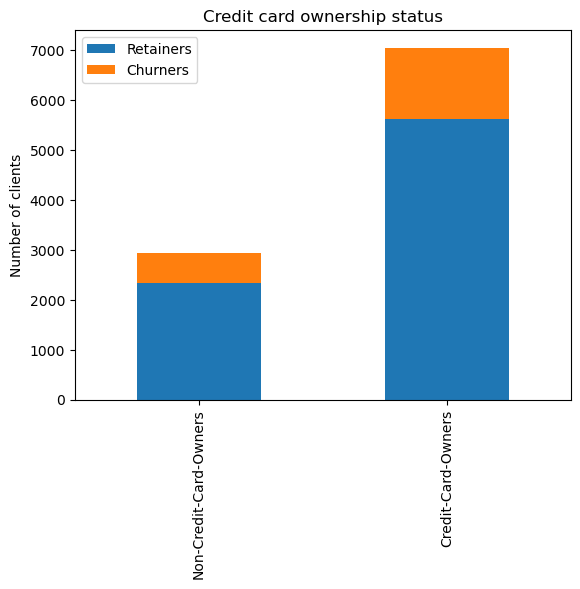

Exited,0,1
HasCrCard,,
Non-Credit-Card-Owners,79.19%,20.81%
Credit-Card-Owners,79.82%,20.18%


<Figure size 1000x600 with 0 Axes>

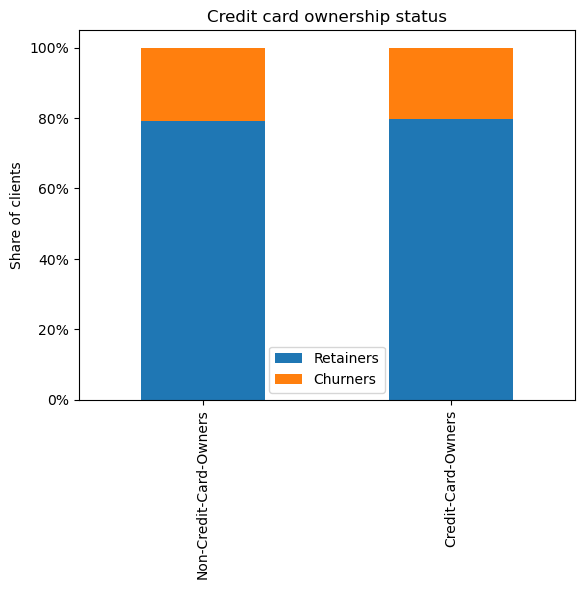

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3535115319.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HasCrCard'] = df['HasCrCard'].replace({'Non-Credit-Card-Owners' : 0, 'Credit-Card-Owners':1})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3535115319.py:42: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['HasCrCard'] = df['HasCrCard'].replace({'Non-Credit-Card-Owners' : 0, 'Credit-Card-Owners':1})


In [8]:
# Analysis of the impact of having a credit card on customer retention/churn

from matplotlib.ticker import PercentFormatter

# Replace 0 and 1 in HasCrCard column with 'Non-Credit-Card-Owners' and 'Credit-Card-Owners'
df['HasCrCard'] = df['HasCrCard'].replace({0: 'Non-Credit-Card-Owners', 1: 'Credit-Card-Owners'})

# creating crosstab
HasCrCard_crosstab = pd.crosstab(df['HasCrCard'], df['Exited'])
display(HasCrCard_crosstab)
# moves the index (HasCrCard) to a column and resets the index to default integers
HasCrCard_crosstab = HasCrCard_crosstab.reset_index()

# bar plot
plt.figure(figsize=(10, 6))
HasCrCard_crosstab.plot(kind='bar', x='HasCrCard', stacked=True, ) #
plt.title('Credit card ownership status')
plt.xlabel('')
plt.ylabel('Number of clients')
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

#####################################################

# creating crosstab with normalization
HasCrCard_crosstab = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index') * 100
display(HasCrCard_crosstab.round(2).astype(str) + '%')
# moves the index (HasCrCard) to a column and resets the index to default integers
HasCrCard_crosstab = pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index')
HasCrCard_crosstab = HasCrCard_crosstab.reset_index()

# bar plot of normalized values
plt.figure(figsize=(10, 6))
ax = HasCrCard_crosstab.plot(kind='bar', x='HasCrCard', stacked=True)
plt.title('Credit card ownership status')
plt.xlabel('')
plt.ylabel('Share of clients')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

df['HasCrCard'] = df['HasCrCard'].replace({'Non-Credit-Card-Owners' : 0, 'Credit-Card-Owners':1})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3249042558.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['IsActiveMember'] = df['IsActiveMember'].replace({0: 'Not active', 1: 'Active'})


Exited,0,1
IsActiveMember,,
Not active,3547,1302
Active,4416,735


<Figure size 1000x600 with 0 Axes>

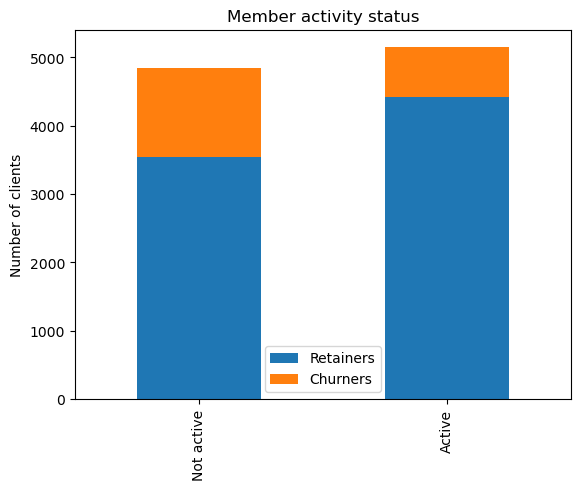

Exited,0,1
IsActiveMember,,
Not active,73.15%,26.85%
Active,85.73%,14.27%


<Figure size 1000x600 with 0 Axes>

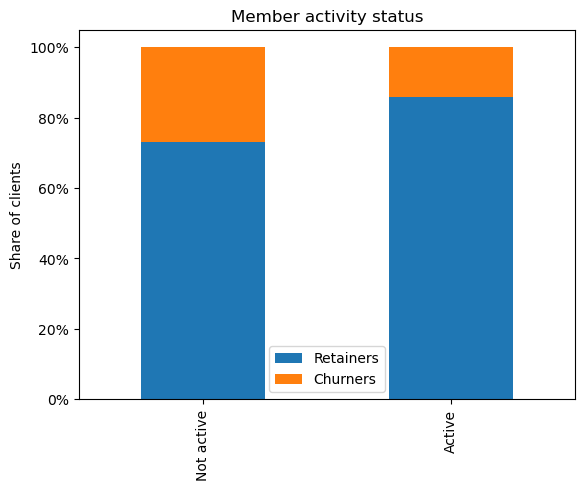

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3249042558.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IsActiveMember'] = df['IsActiveMember'].replace({'Not active' : 0, 'Active':1})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3249042558.py:42: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['IsActiveMember'] = df['IsActiveMember'].replace({'Not active' : 0, 'Active':1})


In [9]:
# analizing IsActiveMember
# Analysis of the impact of beeing Activ/Non-Active Member on customer retention/churn


# Replace 0 and 1 in HasCrCard column with 'Not active' and 'Active'
df['IsActiveMember'] = df['IsActiveMember'].replace({0: 'Not active', 1: 'Active'})

# creating crosstab
IsActiveMember_crosstab = pd.crosstab(df['IsActiveMember'], df['Exited'])
display(IsActiveMember_crosstab)
# moves the index (IsActiveMember) to a column and resets the index to default integers
IsActiveMember_crosstab = IsActiveMember_crosstab.reset_index()

# bar plot
plt.figure(figsize=(10, 6))
IsActiveMember_crosstab.plot(kind='bar', x='IsActiveMember', stacked=True, ) #
plt.title('Member activity status')
plt.xlabel('')
plt.ylabel('Number of clients')
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

#####################################################

# creating crosstab with normalization
IsActiveMember_crosstab = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index') * 100
display(IsActiveMember_crosstab.round(2).astype(str) + '%')
# moves the index (IsActiveMember) to a column and resets the index to default integers
IsActiveMember_crosstab = pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index')
IsActiveMember_crosstab = IsActiveMember_crosstab.reset_index()

# bar plot of normalized values
plt.figure(figsize=(10, 6))
ax = IsActiveMember_crosstab.plot(kind='bar', x='IsActiveMember', stacked=True)
plt.title('Member activity status')
plt.xlabel('')
plt.ylabel('Share of clients')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(labels=['Retainers', 'Churners'])  #  0=Retainers, 1=Churners
plt.show()

df['IsActiveMember'] = df['IsActiveMember'].replace({'Not active' : 0, 'Active':1})

In [10]:
# changing data types
df['CustomerId'] = df['CustomerId'].astype('string')
df['Surname'] = df['Surname'].astype('string')
#df['Geography'] = df['Geography'].map({'Spain':1,'France':2,'Germany':3,})
#df['Geography'] = pd.to_numeric(df['Geography'], downcast='integer')
#df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
#df['Gender'] = pd.to_numeric(df['Gender'], downcast='integer')



display(df.dtypes)

CustomerId         string[python]
Surname            string[python]
CreditScore                 int64
Geography                category
Gender                   category
Age                         int64
Tenure                      int64
Balance                   float64
NumOfProducts               int64
HasCrCard                category
IsActiveMember           category
EstimatedSalary           float64
Exited                   category
dtype: object

In [11]:
# read statistics
display(df.describe().round(2))

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24
std,96.65,10.49,2.89,62397.41,0.58,57510.49
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,3.00,0.00,1.00,51002.11
50%,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,718.00,44.00,7.00,127644.24,2.00,149388.25
max,850.00,92.00,10.00,250898.09,4.00,199992.48


In [12]:
#checking Nans
print("\nNaN values per column:")
display(df.isna().sum())


NaN values per column:


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
#checking duplicates

duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print('Number of duplicate rows:', duplicate_count)

Number of duplicate rows: 0


In [14]:
# unique_counts = df.nunique()
print('Unique values per column:\n\n', df.nunique())

Unique values per column:

 CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [15]:
# columnes with few unique values

column_with_few_unique_values = [
    'Geography',
    'Gender',
    'Tenure',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'Exited',]

# examine unique values
for column in column_with_few_unique_values:
    # count of unique values
    display(df[column].value_counts())
        
    # % of unique values
    #display(pd.crosstab(index=df[column], columns='count', normalize='columns'))
        
    print('-' * 40)  # separator

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

----------------------------------------


Gender
Male      5457
Female    4543
Name: count, dtype: int64

----------------------------------------


Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

----------------------------------------


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

----------------------------------------


HasCrCard
1    7055
0    2945
Name: count, dtype: int64

----------------------------------------


IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

----------------------------------------


Exited
0    7963
1    2037
Name: count, dtype: int64

----------------------------------------


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\3424278965.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age', 'Exited']).size().unstack(fill_value=0)


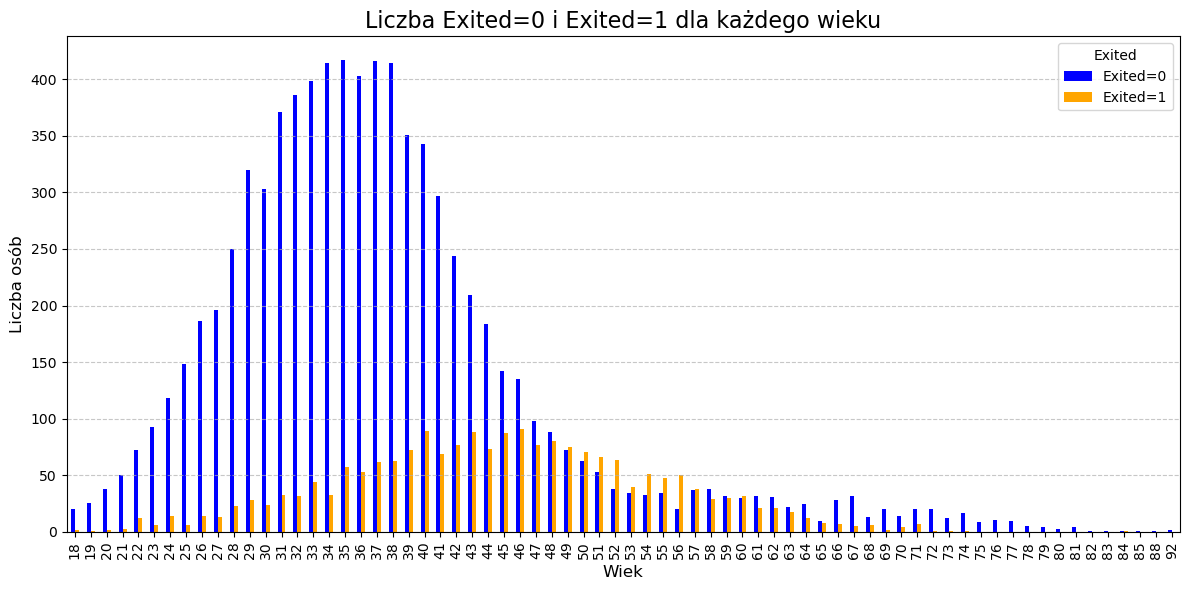

In [16]:
grouped = df.groupby(['Age', 'Exited']).size().unstack(fill_value=0)

# Tworzenie wykresu
grouped.plot(kind='bar', stacked=False, figsize=(12, 6), color=['blue', 'orange'])

# Dodanie tytułu i etykiet osi
plt.title('Liczba Exited=0 i Exited=1 dla każdego wieku', fontsize=16)
plt.xlabel('Wiek', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)
plt.legend(['Exited=0', 'Exited=1'], title='Exited', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\975627624.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Tenure', 'Exited']).size().unstack(fill_value=0)


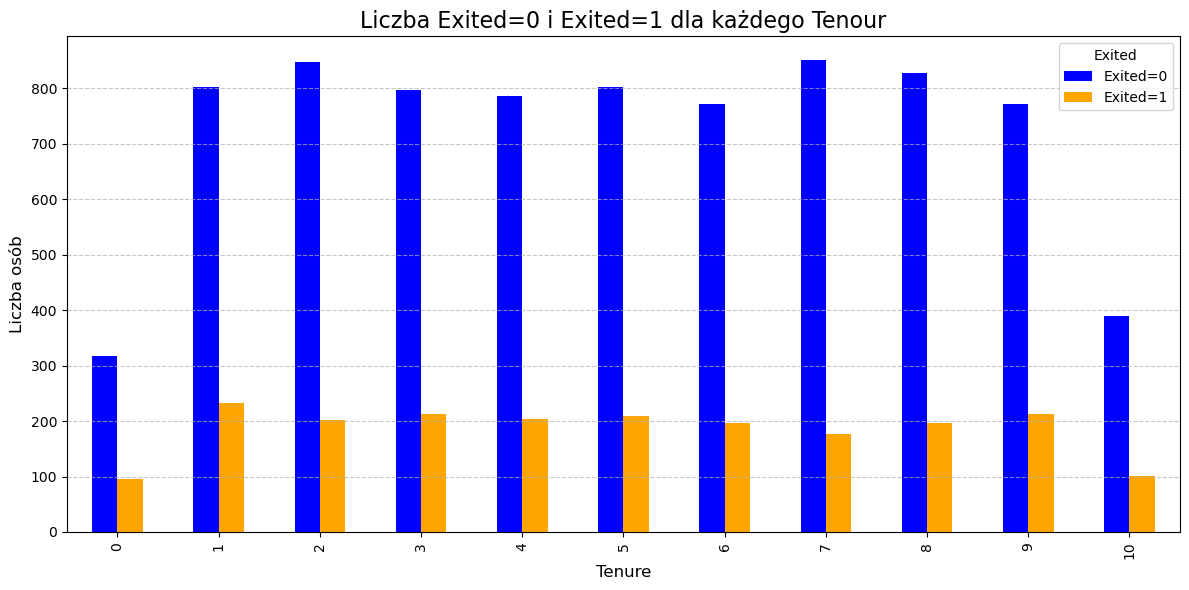

In [17]:
grouped = df.groupby(['Tenure', 'Exited']).size().unstack(fill_value=0)

# Tworzenie wykresu
grouped.plot(kind='bar', stacked=False, figsize=(12, 6), color=['blue', 'orange'])

# Dodanie tytułu i etykiet osi
plt.title('Liczba Exited=0 i Exited=1 dla każdego Tenour', fontsize=16)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)
plt.legend(['Exited=0', 'Exited=1'], title='Exited', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20132\2514383450.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['CreditScore', 'Exited']).size().unstack(fill_value=0)


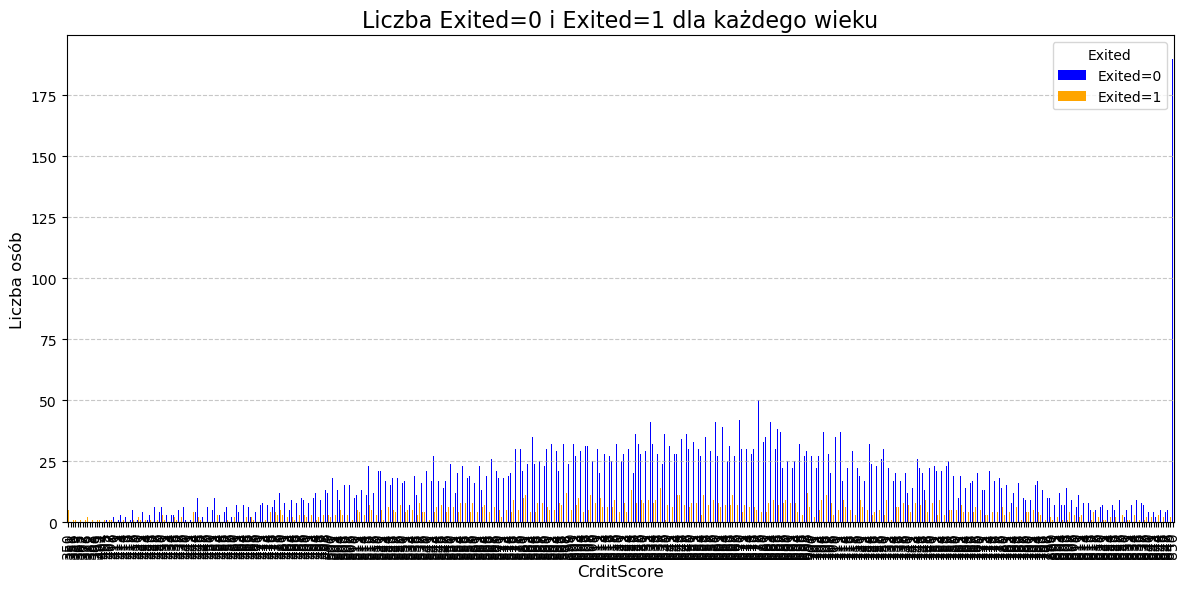

In [18]:
grouped = df.groupby(['CreditScore', 'Exited']).size().unstack(fill_value=0)

# Tworzenie wykresu
grouped.plot(kind='bar', stacked=False, figsize=(12, 6), color=['blue', 'orange'])

# Dodanie tytułu i etykiet osi
plt.title('Liczba Exited=0 i Exited=1 dla każdego wieku', fontsize=16)
plt.xlabel('CrditScore', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)
plt.legend(['Exited=0', 'Exited=1'], title='Exited', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

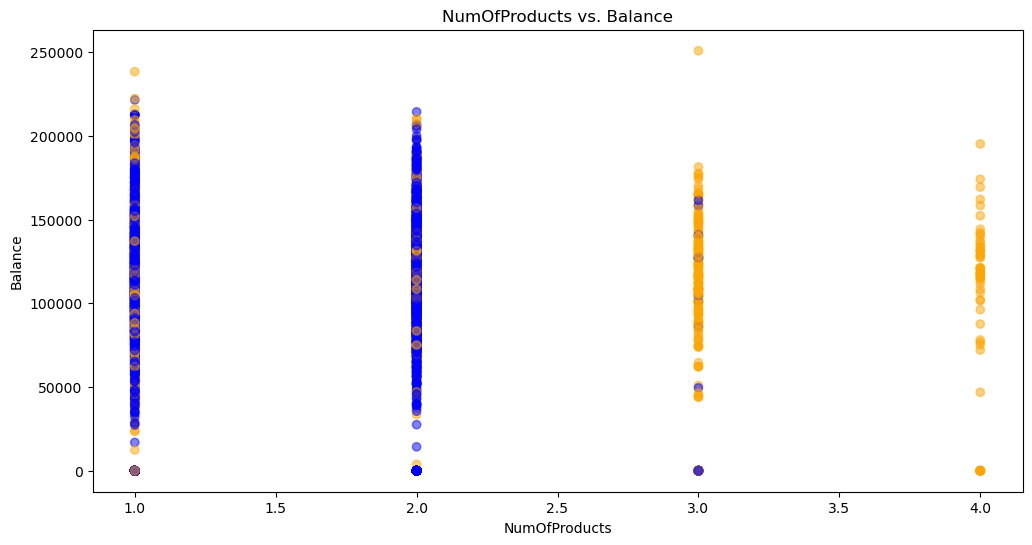

In [19]:
# simple scatter plot showing outliers

# Mapowanie kolorów: 0 -> niebieski, 1 -> pomarańczowy
colors = df['Exited'].map({0: 'blue', 1: 'orange'})

plt.figure(figsize=(12, 6))
plt.scatter(df['NumOfProducts'], df['Balance'], alpha=0.5, c=colors)
plt.title('NumOfProducts vs. Balance')
plt.xlabel('NumOfProducts')
plt.ylabel('Balance')
plt.show()

Conclusions:

In [20]:
# distribution of numerical values
#display(sns.pairplot(df, hue = 'Exited',diag_kws={'common_norm': True}))

Conclusions:
    After first glance the churn is mostly to see for:
    - Age between 40 and 60
    - NumOfProducts of 3 and more
    - CreditScore of less than 400
    - German customers        

#corelated fetures

<Axes: >

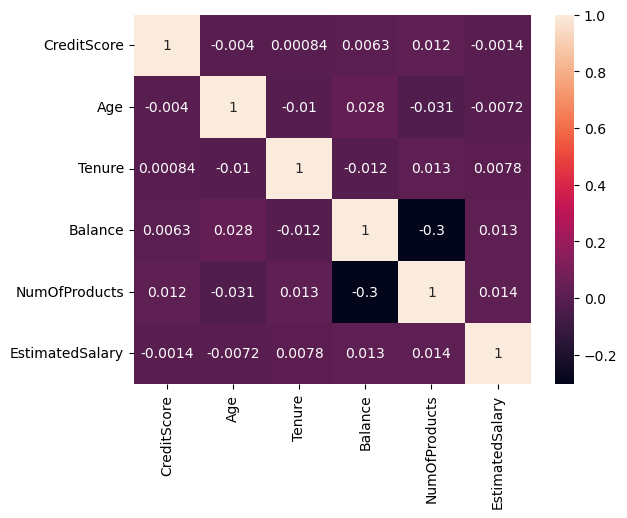

In [21]:
#corelated fetures
# Wybieramy tylko kolumny numeryczne
numerical_df = df.select_dtypes(include=['float64', 'int64', 'int8' ])

# Obliczamy korelację tylko na danych numerycznych
sns.heatmap(numerical_df.corr(), annot=True)

In [22]:
numerical_df.corr().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.00,-0.00,0.00,0.01,0.01,-0.00
Age,-0.00,1.00,-0.01,0.03,-0.03,-0.01
Tenure,0.00,-0.01,1.00,-0.01,0.01,0.01
Balance,0.01,0.03,-0.01,1.00,-0.30,0.01
NumOfProducts,0.01,-0.03,0.01,-0.30,1.00,0.01
EstimatedSalary,-0.00,-0.01,0.01,0.01,0.01,1.00


The correlations between are not significant. The highest is 0.33 between Balance and Geography. Similar correlated are  Age,  Exited NumOfProducts and Balance.
It is probably due to the fact that they are synthetic data.

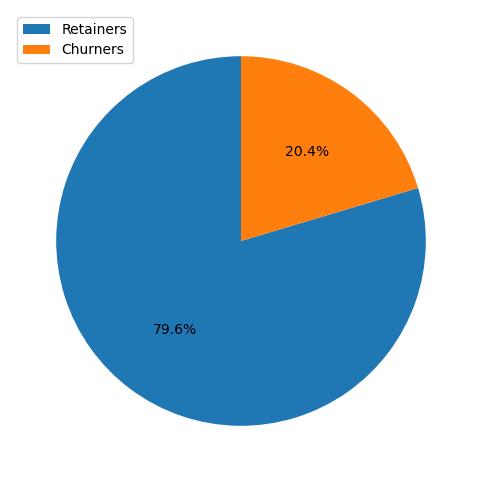

In [23]:
# checking if target categories are balanced
# pie chart of Exited

# data
crosstab = pd.crosstab(index=df['Exited'], columns='count', normalize='columns')
pie_data = crosstab['count'] # transform the crosstab into a simple series for the pie chart
labels = ['Retainers', 'Churners']  # 0: Stayed, 1: Exited
#display(crosstab)

# chart
plt.figure(figsize=(6, 6))
plt.pie(pie_data, autopct='%1.1f%%', startangle=90)
# plt.title('Exited among all cars')
plt.legend(labels, loc="upper left")
plt.show()

In [24]:
# perform train-test-split
df = pd.read_csv("Churn_Modelling.csv")

from sklearn.model_selection import train_test_split

target = df.loc[:,'Exited']
features = df.drop('Exited', axis=1)

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state=42,
                                                                            test_size=0.1)
#features_original = features_train

In [25]:
features_test.to_csv('features_test.csv', index=False)

In [26]:
#copy feature_train
#df = features_train.copy()

# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
# delete RowNumber
df = df.drop('RowNumber', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [28]:
# List of columns to be converted to 'category' type

category_columns = [

 'Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
]

# Convert each column to 'category' type

for column in category_columns:
    df[column] = df[column].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int64   
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(5), object(1)
memory usage: 674.6+ KB


In [29]:
df[['CustomerId', 'Surname']] = df[['CustomerId', 'Surname']].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  string  
 1   Surname          10000 non-null  string  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int64   
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(4), string(2)
memory usage: 674.6 KB


In [30]:
# dealing with outliers:

# there is no impossible values in data set

In [31]:
features_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9000 non-null   int64  
 1   CustomerId       9000 non-null   int64  
 2   Surname          9000 non-null   object 
 3   CreditScore      9000 non-null   int64  
 4   Geography        9000 non-null   object 
 5   Gender           9000 non-null   object 
 6   Age              9000 non-null   int64  
 7   Tenure           9000 non-null   int64  
 8   Balance          9000 non-null   float64
 9   NumOfProducts    9000 non-null   int64  
 10  HasCrCard        9000 non-null   int64  
 11  IsActiveMember   9000 non-null   int64  
 12  EstimatedSalary  9000 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 984.4+ KB


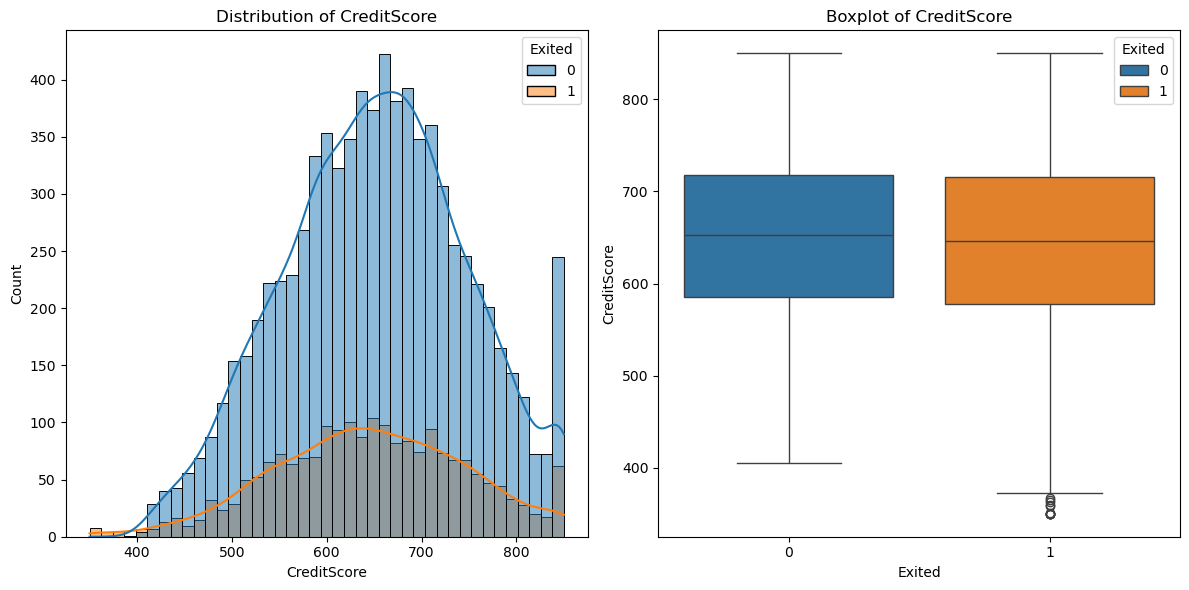

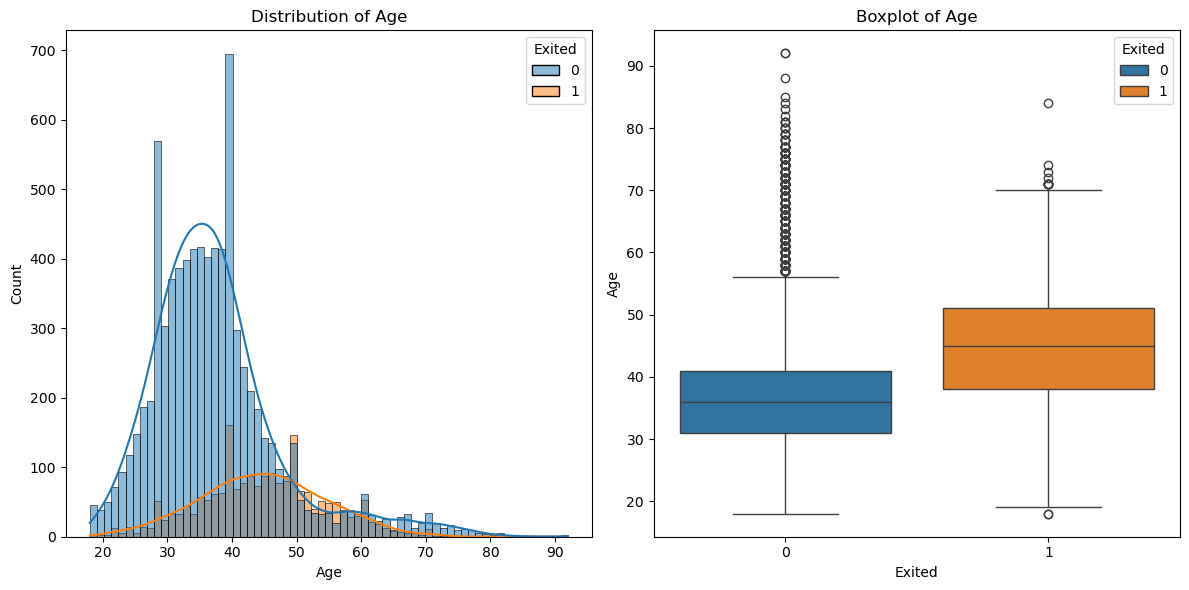

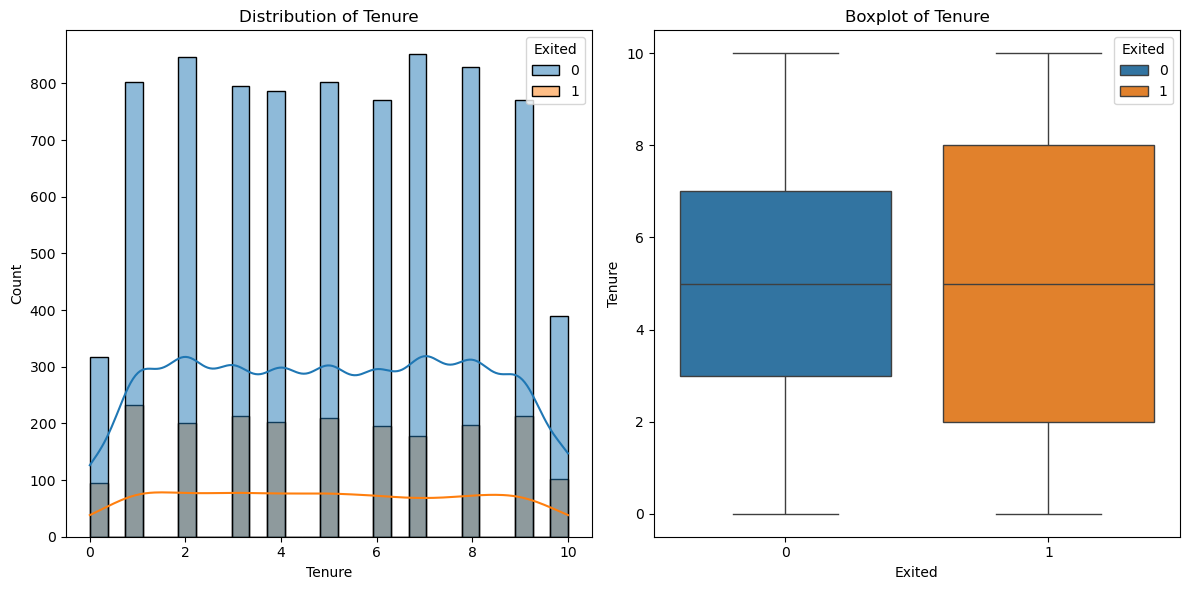

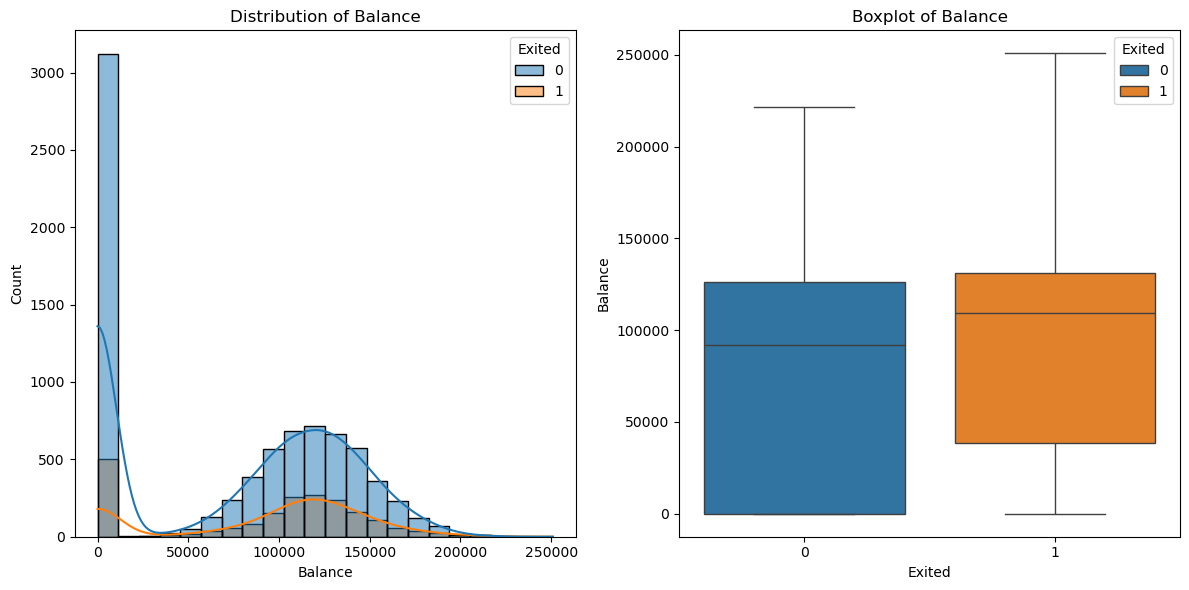

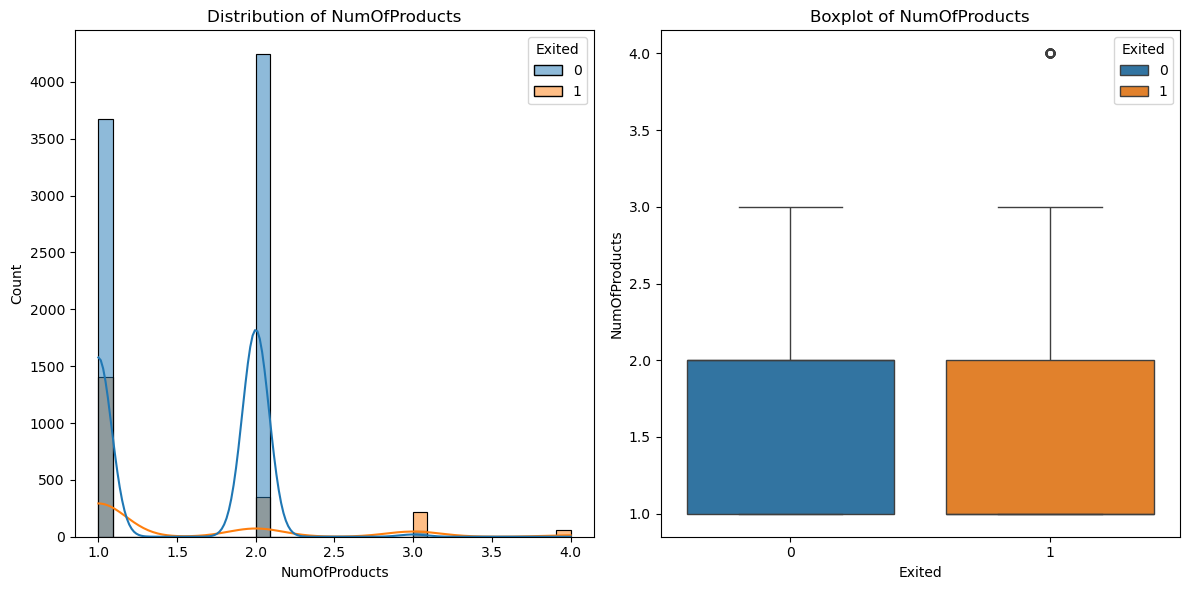

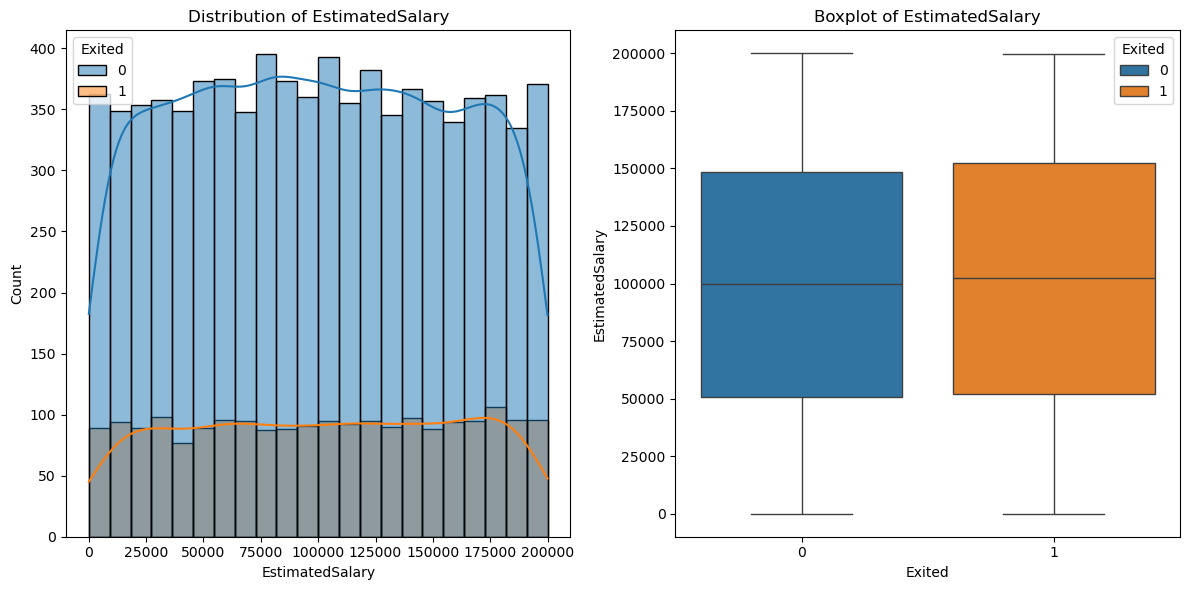

In [32]:
#import seaborn as sns
#import matplotlib.pyplot as plt


# Verteile die numerischen Spalten mit sns.distplot() und sns.boxplot()
# Auswahl der numerischen Spalten
df_numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
#features_with_target = pd.concat([df, target_train], axis=1)
# Visualisierung der Verteilungen
for column in df_numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Verteilung mit distplot
    plt.subplot(1, 2, 1) # one row, two columnes, first column from left
    sns.histplot(data=df, x=column, kde=True, hue='Exited')
    #sns.histplot(features_with_target[column], kde=True, hue='Exited'  )
    plt.title(f'Distribution of {column}')
    
    # Boxplot zur Identifikation von Ausreißern
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Exited', y=df[column], data=df, hue='Exited')
    #sns.boxplot(x=features_with_target[column], hue='Exited')
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

In [33]:
# definiujemy funkcjie ktora bedzie robic cleanning for feature_train and feature_test

def clean_data(df):
    """Returns cleaned DataFrame.
    
    Processes:
        -transform data into less demanding formats
        -removing irrelevant columnes
    
    Args: 
        df (pd.DataFrame) : uncleaned DataFrame
        
    Returns:
        df  (pd.DataFrame) : cleaned DataFrame
    
    """

    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # removing unnecessary columns
    df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)
    
    # Convert columns to 'category' type

    df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

    category_columns = ['Geography']
    for column in category_columns:
        df[column] = df[column].astype('category')
    
    # convert to string type    
    #df[['CustomerId', 'Surname']] = df[['CustomerId', 'Surname']].astype('string')

    # convert numerical columns - data type optimization
    df['Age'] = df['Age'].astype('uint8')
    df['Tenure'] = df['Tenure'].astype('uint8')
    df['NumOfProducts'] = df['NumOfProducts'].astype('uint8')
    df['CreditScore'] = df['CreditScore'].astype('uint16')
        
    return df

In [34]:
features_train_cleaned = clean_data(features_train)
features_train_cleaned.info()
features_test_cleaned = clean_data(features_test)
features_test_cleaned.info()

features_train_cleaned
# read statistics
#display(features_train.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9000 non-null   uint16  
 1   Geography        9000 non-null   category
 2   Gender           9000 non-null   int64   
 3   Age              9000 non-null   uint8   
 4   Tenure           9000 non-null   uint8   
 5   Balance          9000 non-null   float64 
 6   NumOfProducts    9000 non-null   uint8   
 7   HasCrCard        9000 non-null   int64   
 8   IsActiveMember   9000 non-null   int64   
 9   EstimatedSalary  9000 non-null   float64 
dtypes: category(1), float64(2), int64(3), uint16(1), uint8(3)
memory usage: 474.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 6252 to 7713
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      1000 non-null   uint16  

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4896,605,France,0,41,5,91612.91,1,1,1,28427.84
4782,752,France,1,53,8,114233.18,1,1,1,51587.04
1496,569,Spain,0,38,8,0.00,2,0,0,79618.79
1957,710,France,0,54,6,171137.62,1,1,1,167023.95
9171,411,France,1,54,9,0.00,1,0,1,76621.49
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,0,54,8,69712.74,1,1,1,69381.05
5191,682,France,1,58,1,0.00,1,1,1,706.50
5390,735,France,1,38,1,0.00,3,0,0,92220.12
860,667,France,0,43,8,190227.46,1,1,0,97508.04


In [35]:
target_train.shape

(9000,)

In [36]:
 # defining function resample_data()

def resample_data(x, y):
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    features_resampled, target_resampled = ros.fit_resample(x, y)
    pd.crosstab(index=target_resampled,
            columns='count')
    return  features_resampled, target_resampled 

In [37]:
# applying function resample_data()
#features_resampled, target_resampled = resample_data(features_train, target_train)
features_train_resampled, target_train_resampled = resample_data(features_train_cleaned, target_train)

# checking after resampling
pd.crosstab(index=target_train_resampled,
            columns='count')

col_0,count
Exited,
0,7154
1,7154


In [38]:
features_train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [39]:
features_train_resampled.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Definiowanie kolumn
categorical_columns = ['Geography']  # Kolumny kategoryczne
boolean_columns = ['HasCrCard', 'IsActiveMember', 'Gender']  # Kolumny logiczne
numerical_columns = [
                    'CreditScore',
                     'Age',
                     'Tenure',
                     'Balance', 'NumOfProducts', 'EstimatedSalary']  # Kolumny numeryczne
#polynomial_columnes = [''Age', 'Balance', EstimatedSalary', 'CreditScore']

# Pipeline dla kolumn kategorycznych
cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder()),]) # Kodowanie wartości kategorycznych na postać OneHot

# Pipeline dla kolumn numerycznych
num_pipe = Pipeline(steps=[('std', StandardScaler())]) # Standaryzacja danych numerycznych (średnia = 0, odchylenie standardowe = 1)

# Definiowanie transformacji dla kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),  # Przetwarzanie kolumn kategorycznych
        ('num', num_pipe, numerical_columns),  # Przetwarzanie kolumn numerycznych
        # polynomials
        ('bool', 'passthrough', boolean_columns),  # Przepuszczenie kolumn logicznych bez zmian
    ],
    remainder='drop'  # Usunięcie wszystkich kolumn, które nie zostały wymienione w 'transformers'
)

In [ ]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    # besten 10 features selectKBest
    ('classifier', RandomForestClassifier()) # Klasyfikator RandomForest
])  

In [74]:
from sklearn.metrics import classification_report  # Importowanie funkcji do generowania raportu klasyfikacji
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
# evaluation of prediction
r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       809
           1       0.63      0.55      0.59       191

    accuracy                           0.85      1000
   macro avg       0.76      0.74      0.75      1000
weighted avg       0.85      0.85      0.85      1000

Confusion Matrix:
 [[746  63]
 [ 85 106]]

roc_auc: 0.8591791300746184


In [ ]:
# Grid search for Random Forest Pipe
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', RandomForestClassifier(class_weight='balanced',
                                          n_estimators=50, # number of decision trees
                                          random_state=42))  # Klasyfikator RandomForest
])

search_space_rf = {'classifier__max_depth': np.geomspace(start=3, stop=50, num=10, dtype='int'),
                   'classifier__min_samples_leaf': [1, 2, 4, 8, 16, 20] } # before:  np.geomspace(start=1, stop=500, num=10, dtype='int')}  

rf_grid_search = GridSearchCV(estimator=r_forest_pipe,
                        param_grid=search_space_rf,
                        scoring='f1',
                        cv=5)

rf_grid_search.fit(features_train_resampled, target_train_resampled)

print(rf_grid_search.best_estimator_)
print(rf_grid_search.best_score_)
#print(rf_grid_search.best_estimator_.get_params())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                          

In [106]:
#model_rf.cv_results_.keys()
#pd.DataFrame(model_rf.cv_results_)

In [86]:
# Random Forest Pipe with best estimators from Grid Search
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', RandomForestClassifier(class_weight='balanced',
                                          max_depth=26,
                                          n_estimators=50,
                                          random_state=42))  # Klasyfikator RandomForest
])

r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       809
           1       0.64      0.54      0.58       191

    accuracy                           0.85      1000
   macro avg       0.77      0.73      0.75      1000
weighted avg       0.85      0.85      0.85      1000



In [112]:
# Uczenie modelu
r_forest_pipe.fit(features_train_resampled, target_train_resampled)

# Wyciąganie RandomForestClassifier z potoku
rf_model = r_forest_pipe.named_steps['classifier']

# Uzyskiwanie feature_importances_ z modelu
importances = rf_model.feature_importances_

# Uzyskiwanie nazw cech po transformacjach
# 1. Kolumny z "Geography" po OneHotEncoder
geography_columns = r_forest_pipe.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features=['Geography'])

# 2. Kolumny numeryczne
num_columns = r_forest_pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(input_features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

# 3. Kolumny boolowskie (nie przekształcone)
bool_columns = ['HasCrCard', 'IsActiveMember', 'Gender']

# Połączenie wszystkich nazw cech
all_columns = list(geography_columns) + list(num_columns) + bool_columns

# Połączenie nazw cech z ich istotnościami
feature_importances_with_names = zip(all_columns, importances)

# Posortowanie cech według istotności w porządku malejącym
sorted_feature_importances = sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True)

# Wyświetlenie posortowanych wyników z zaokrągleniem do 2 miejsc po przecinku i przekształcenie na procenty
print('Features importance:')
for feature, importance in sorted_feature_importances:
    importance_percent = round(importance * 100, 2)  # Przekształcenie na procenty
    print(f"{feature}: {importance_percent}%")




Features importance:
Age: 26.4%
Balance: 14.04%
EstimatedSalary: 13.87%
CreditScore: 13.33%
NumOfProducts: 12.72%
Tenure: 8.05%
IsActiveMember: 3.61%
Geography_Germany: 2.18%
Gender: 1.95%
HasCrCard: 1.8%
Geography_France: 1.09%
Geography_Spain: 0.94%


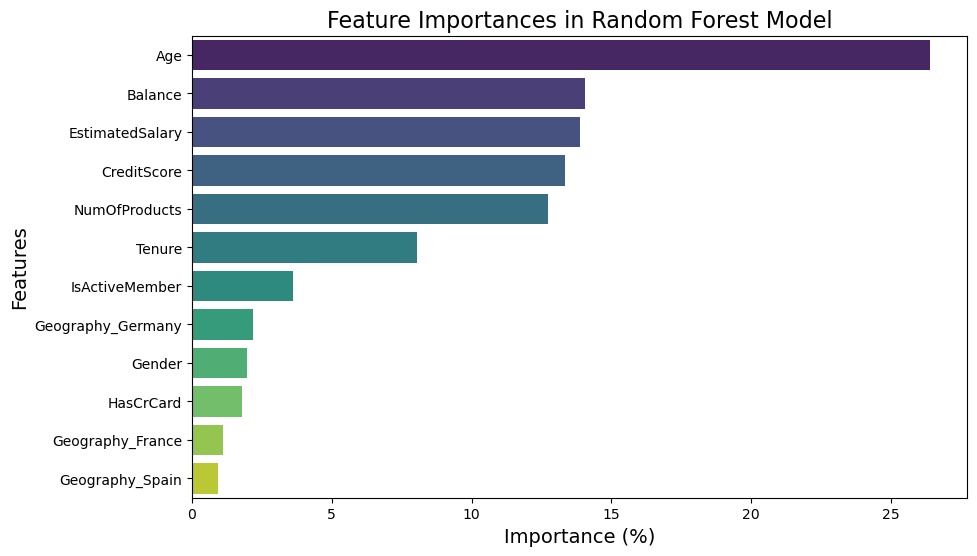

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uzyskiwanie danych z posortowanymi nazwami cech i ich istotnościami
features = [feature for feature, _ in sorted_feature_importances]
importances_percent = [round(importance * 100, 2) for _, importance in sorted_feature_importances]

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_percent, y=features, palette='viridis')

# Tytuł wykresu
plt.title("Feature Importances in Random Forest Model", fontsize=16)
plt.xlabel("Importance (%)", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Wyświetlenie wykresu
plt.show()


In [115]:
# Pipeline for k-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', KNeighborsClassifier())  # Klasyfikator k-Nearest Neighbors
])

# classifikation report for k-nearets neighbours
knn_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = knn_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       809
           1       0.41      0.73      0.53       191

    accuracy                           0.75      1000
   macro avg       0.67      0.74      0.68      1000
weighted avg       0.83      0.75      0.77      1000



In [116]:
# preparing search grid for knn

k = np.unique(np.geomspace(1, 500, 15, dtype='int'))  # create 15 values between 1 and 500 with increasing distance
search_space_knn = {'classifier__n_neighbors': k,  # use the created values as number of neighbors
                    'classifier__weights': ['uniform', 'distance']}

search_space_knn

{'classifier__n_neighbors': array([  1,   2,   3,   5,   9,  14,  22,  34,  54,  84, 132, 205, 320,
        500]),
 'classifier__weights': ['uniform', 'distance']}

In [117]:
# grid search for knn

# knn_grid_search
knn_grid_search = GridSearchCV(estimator=knn_pipe, 
                         param_grid=search_space_knn, 
                         scoring='f1',
                         cv=5)

knn_grid_search.fit(features_train_resampled, target_train_resampled)

print(knn_grid_search.best_estimator_)
print(knn_grid_search.best_score_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                          

In [63]:
# Pipeline for k-Nearest Neighbors with best estimator

from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', KNeighborsClassifier(n_neighbors=1))  # Klasyfikator k-Nearest Neighbors
])

# classifikation report for k-nearets neighbours
knn_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = knn_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       809
           1       0.49      0.49      0.49       191

    accuracy                           0.81      1000
   macro avg       0.69      0.68      0.68      1000
weighted avg       0.81      0.81      0.81      1000



In [64]:
# Pipeline for Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_reg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', LogisticRegression())  # Klasyfikator Logistic Regression
])

# classifikation report for log_reg
log_reg_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = log_reg_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       809
           1       0.37      0.72      0.49       191

    accuracy                           0.71      1000
   macro avg       0.64      0.72      0.65      1000
weighted avg       0.81      0.71      0.74      1000



In [65]:
# Pipeline 2 for Logistic Regression Model

from sklearn.linear_model import LogisticRegression
log_reg_pipe_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', LogisticRegression(solver='saga',
                                      class_weight='balanced',
                                      max_iter=10000,
                                      random_state=42))  # Klasyfikator Logistic Regression
])

# preparing grid search for log_reg
C_values = np.geomspace(start=0.001, stop=1000, num=14)

search_space_log = {'classifier__penalty': ['l1', 'l2'],
                    'classifier__C': C_values
                   }
search_space_log

{'classifier__penalty': ['l1', 'l2'],
 'classifier__C': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
        7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
        4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
        3.45510729e+02, 1.00000000e+03])}

In [ ]:
# running grid serch for log_reg
log_grid_search = GridSearchCV(estimator=log_reg_pipe_2,
                         param_grid=search_space_log,
                         scoring='f1', #  for Exited = 1
                         cv=5)

log_grid_search.fit(features_train_resampled, target_train_resampled)

print(log_grid_search.best_estimator_)
print(log_grid_search.best_score_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography']),
                                                 ('num',
                                                  Pipeline(steps=[('std',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('bool', 'passthrough',
                                                  ['HasCrCard',
                                          

In [67]:
# Pipeline for Logistic Regression Model with best estimator

from sklearn.linear_model import LogisticRegression
log_reg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    ('classifier', LogisticRegression(C=0.008376776400682925,
                                      class_weight='balanced', 
                                      max_iter=10000,
                                      random_state=42, 
                                      solver='saga'))  # Klasyfikator Logistic Regression
])

# classifikation report for log_reg
log_reg_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = log_reg_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       809
           1       0.37      0.72      0.49       191

    accuracy                           0.72      1000
   macro avg       0.64      0.72      0.65      1000
weighted avg       0.81      0.72      0.74      1000



In [154]:
from sklearn.preprocessing import PolynomialFeatures

# Definiowanie kolumn
categorical_columns = ['Geography']  # Kolumny kategoryczne
boolean_columns = ['HasCrCard', 'IsActiveMember', 'Gender']  # Kolumny logiczne
numerical_columns = [
                    'Tenure',
                    'NumOfProducts'
                    ]  # Kolumny numeryczne

polynomial_columnes = ['Age', 'Balance', 'EstimatedSalary', 'CreditScore']

# Pipeline dla kolumn kategorycznych
cat_pipe = Pipeline(steps=[('ohe', OneHotEncoder()),]) # Kodowanie wartości kategorycznych na postać OneHot

# Pipeline dla kolumn numerycznych
num_pipe = Pipeline(steps=[('std', StandardScaler())]) # Standaryzacja danych numerycznych (średnia = 0, odchylenie standardowe = 1)

# Pipeline dla polynomial columns
poly_pipe = Pipeline(steps=[('std', StandardScaler()), 
                            ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False))])

# Definiowanie transformacji dla kolumn
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipe, categorical_columns),  # Przetwarzanie kolumn kategorycznych
        ('num', num_pipe, numerical_columns),  # Przetwarzanie kolumn numerycznych
        ('pol', poly_pipe, polynomial_columnes),
        ('bool', 'passthrough', boolean_columns),  # Przepuszczenie kolumn logicznych bez zmian
    ],
    remainder='drop'  # Usunięcie wszystkich kolumn, które nie zostały wymienione w 'transformers'
)

In [155]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing danych (transformacje na podstawie preprocessor)
    # besten 10 features selectKBest
    ('classifier', RandomForestClassifier()) # Klasyfikator RandomForest
])  

In [156]:
# evaluation of prediction
r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       809
           1       0.62      0.49      0.55       191

    accuracy                           0.84      1000
   macro avg       0.75      0.71      0.73      1000
weighted avg       0.83      0.84      0.84      1000

Confusion Matrix:
 [[751  58]
 [ 97  94]]

roc_auc: 0.8389842025899727


In [157]:
# Przekształcenie danych treningowych za pomocą preprocessor
transformed_train_features = preprocessor.fit_transform(features_train_cleaned)

# Przekształcenie danych testowych za pomocą tego samego preprocessor
transformed_test_features = preprocessor.transform(features_test_cleaned)

# Pobranie nazw kolumn po każdej transformacji:
# 1. Kolumny z "Geography" po OneHotEncoder
geography_columns = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out(input_features=['Geography'])

# 2. Kolumny numeryczne po standaryzacji
num_columns = numerical_columns  # Standaryzacja nie zmienia nazw kolumn

# 3. Kolumny wielomianowe
polynomial_transformer = preprocessor.transformers_[2][1].named_steps['poly']
poly_columns = polynomial_transformer.get_feature_names_out(input_features=polynomial_columnes)

# 4. Kolumny boolowskie (przepuszczone bez zmian)
bool_columns = boolean_columns

# Połączenie nazw wszystkich cech w odpowiedniej kolejności
all_transformed_columns = list(geography_columns) + num_columns + list(poly_columns) + bool_columns

# Tworzenie DataFrame z przekształconymi danymi treningowymi
transformed_train_df = pd.DataFrame(transformed_train_features, columns=all_transformed_columns)

# Tworzenie DataFrame z przekształconymi danymi testowymi
transformed_test_df = pd.DataFrame(transformed_test_features, columns=all_transformed_columns)

# Wyświetlenie pełnego DataFrame dla danych treningowych
display(transformed_train_df)

# Wyświetlenie pełnego DataFrame dla danych testowych
display(transformed_test_df)


,Geography_France,Geography_Germany,Geography_Spain,Tenure,NumOfProducts,Age,Balance,EstimatedSalary,CreditScore,Age^2,...,Age CreditScore,Balance^2,Balance EstimatedSalary,Balance CreditScore,EstimatedSalary^2,EstimatedSalary CreditScore,CreditScore^2,HasCrCard,IsActiveMember,Gender
0,1.0,0.0,0.0,-0.002346,-0.913645,0.196872,0.249695,-1.241417,-0.479443,0.038759,...,-0.094389,0.062348,-0.309976,-0.119715,1.541117,0.595189,0.229866,1.0,1.0,0.0
1,1.0,0.0,0.0,1.036257,-0.913645,1.338037,0.611930,-0.838930,1.045809,1.790342,...,1.399330,0.374459,-0.513367,0.639962,0.703804,-0.877360,1.093716,1.0,1.0,1.0
2,0.0,0.0,1.0,1.036257,0.807688,-0.088419,-1.217369,-0.351762,-0.852974,0.007818,...,0.075419,1.481987,0.428225,1.038384,0.123737,0.300044,0.727565,0.0,0.0,0.0
3,1.0,0.0,0.0,0.343855,-0.913645,1.433134,1.523182,1.167264,0.610022,2.053872,...,0.874244,2.320084,1.777956,0.929175,1.362506,0.712057,0.372127,1.0,1.0,0.0
4,1.0,0.0,0.0,1.382458,-0.913645,1.433134,-1.217369,-0.403853,-2.492361,2.053872,...,-3.571886,1.481987,0.491638,3.034122,0.163097,1.006547,6.211862,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1.0,0.0,0.0,1.036257,-0.913645,1.433134,-0.101008,-0.529686,1.211822,2.053872,...,1.736703,0.010203,0.053502,-0.122404,0.280567,-0.641885,1.468514,1.0,1.0,0.0
8996,1.0,0.0,0.0,-1.387151,-0.913645,1.813522,-1.217369,-1.723190,0.319498,3.288861,...,0.579417,1.481987,2.097758,-0.388947,2.969385,-0.550556,0.102079,1.0,1.0,1.0
8997,1.0,0.0,0.0,-1.387151,2.529021,-0.088419,-1.217369,-0.132762,0.869419,0.007818,...,-0.076873,1.481987,0.161620,-1.058403,0.017626,-0.115426,0.755889,0.0,0.0,1.0
8998,1.0,0.0,0.0,1.036257,-0.913645,0.387066,1.828882,-0.040863,0.163860,0.149820,...,0.063425,3.344809,-0.074733,0.299681,0.001670,-0.006696,0.026850,1.0,0.0,0.0


,Geography_France,Geography_Germany,Geography_Spain,Tenure,NumOfProducts,Age,Balance,EstimatedSalary,CreditScore,Age^2,...,Age CreditScore,Balance^2,Balance EstimatedSalary,Balance CreditScore,EstimatedSalary^2,EstimatedSalary CreditScore,CreditScore^2,HasCrCard,IsActiveMember,Gender
0,0.0,1.0,0.0,-0.694749,0.807688,-0.659001,0.331304,-1.009223,-0.572826,0.434283,...,0.377493,0.109762,-0.334359,-0.189779,1.018530,0.578109,0.328130,0.0,0.0,0.0
1,1.0,0.0,0.0,-1.387151,0.807688,0.387066,-1.217369,0.808478,-0.292678,0.149820,...,-0.113286,1.481987,-0.984216,0.356297,0.653637,-0.236624,0.085660,1.0,1.0,0.0
2,0.0,0.0,1.0,-0.348548,0.807688,0.482163,-1.217369,-0.717723,-0.520947,0.232481,...,-0.251181,1.481987,0.873734,0.634184,0.515127,0.373896,0.271386,1.0,0.0,1.0
3,0.0,1.0,0.0,1.036257,0.807688,1.908619,0.690700,1.230799,-1.506654,3.642826,...,-2.875628,0.477067,0.850113,-1.040646,1.514866,-1.854388,2.270006,1.0,1.0,0.0
4,0.0,0.0,1.0,0.690056,-0.913645,-1.134487,0.784283,0.257394,-0.946357,1.287060,...,1.073630,0.615099,0.201870,-0.742212,0.066252,-0.243587,0.895592,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,-0.694749,0.807688,1.908619,-1.217369,-1.286327,-0.873726,3.642826,...,-1.667610,1.481987,1.565935,1.063647,1.654638,1.123898,0.763397,1.0,0.0,0.0
996,1.0,0.0,0.0,1.036257,0.807688,-0.468807,-1.217369,-1.065153,-0.157792,0.219780,...,0.073974,1.481987,1.296684,0.192090,1.134551,0.168072,0.024898,1.0,0.0,0.0
997,1.0,0.0,0.0,-0.694749,-0.913645,-1.229584,0.673818,-0.670860,0.402505,1.511876,...,-0.494914,0.454031,-0.452038,0.271215,0.450053,-0.270025,0.162010,1.0,0.0,1.0
998,0.0,0.0,1.0,-0.694749,-0.913645,0.482163,0.206505,-0.524182,-2.066950,0.232481,...,-0.996607,0.042644,-0.108246,-0.426836,0.274766,1.083458,4.272284,1.0,0.0,0.0


In [158]:
# Dopasowanie r_forest_pipe do danych treningowych
r_forest_pipe.fit(features_train_resampled, target_train_resampled)

# Wyciąganie modelu RandomForestClassifier z pipeline
rf_model = r_forest_pipe.named_steps['classifier']

# Uzyskiwanie feature_importances_ z modelu
importances = rf_model.feature_importances_

# Uzyskiwanie nazw cech po przetwarzaniu
# 1. Kolumny z "Geography" po OneHotEncoder
geography_columns = preprocessor.transformers_[0][1].named_steps['ohe'].get_feature_names_out(input_features=['Geography'])

# 2. Kolumny numeryczne
num_columns = numerical_columns  # Nazwy pozostają takie same po standaryzacji

# 3. Kolumny wielomianowe
polynomial_transformer = preprocessor.transformers_[2][1].named_steps['poly']
poly_columns = polynomial_transformer.get_feature_names_out(input_features=polynomial_columnes)

# 4. Kolumny boolowskie
bool_columns = boolean_columns

# Połączenie wszystkich nazw cech w odpowiedniej kolejności
all_columns = list(geography_columns) + num_columns + list(poly_columns) + bool_columns

# Połączenie nazw cech z ich ważnościami
feature_importances_with_names = list(zip(all_columns, importances))

# Posortowanie cech według ważności w porządku malejącym
sorted_feature_importances = sorted(feature_importances_with_names, key=lambda x: x[1], reverse=True)

# Wyświetlenie posortowanych cech z ich ważnościami
print("Feature Importances:")
for feature, importance in sorted_feature_importances:
    importance_percent = round(importance * 100, 2)  # Konwersja na procenty
    print(f"{feature}: {importance_percent}%")


Feature Importances:
Age: 14.55%
NumOfProducts: 10.71%
Age Balance: 7.71%
Balance: 5.35%
Age EstimatedSalary: 4.89%
Balance^2: 4.81%
Balance EstimatedSalary: 4.76%
Age CreditScore: 4.69%
EstimatedSalary^2: 4.56%
Balance CreditScore: 4.55%
EstimatedSalary: 4.55%
EstimatedSalary CreditScore: 4.53%
CreditScore^2: 4.37%
CreditScore: 4.29%
Age^2: 4.03%
Tenure: 3.13%
IsActiveMember: 2.99%
Geography_Germany: 1.87%
Gender: 1.34%
Geography_France: 0.88%
HasCrCard: 0.76%
Geography_Spain: 0.69%


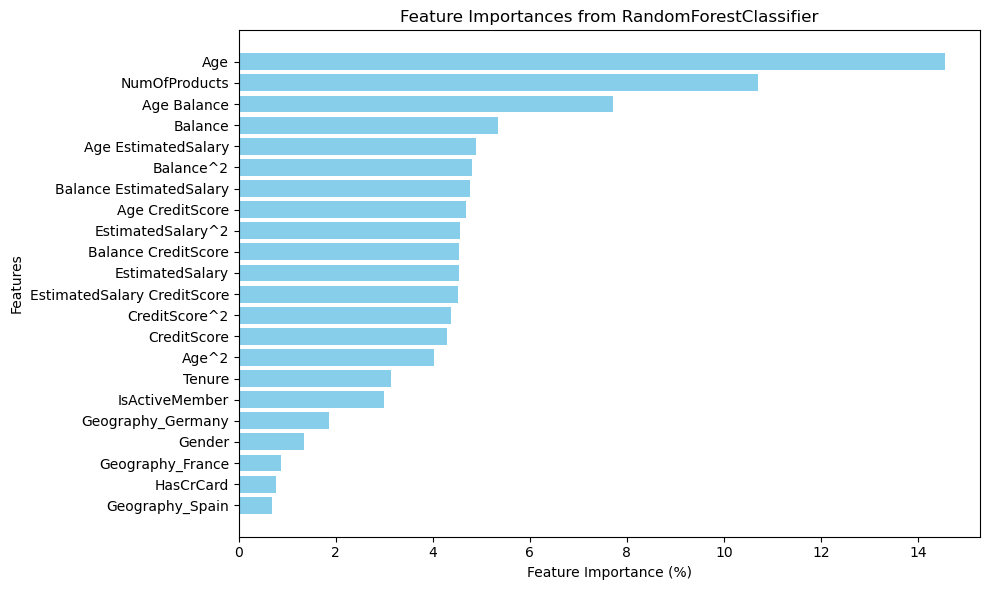

In [159]:
import matplotlib.pyplot as plt

# Ekstrakcja nazw cech i ich ważności z posortowanej listy
features, importances = zip(*sorted_feature_importances)

# Konwersja ważności na procenty
importances_percent = [round(imp * 100, 2) for imp in importances]

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.barh(features, importances_percent, color='skyblue')
plt.xlabel("Feature Importance (%)")
plt.ylabel("Features")
plt.title("Feature Importances from RandomForestClassifier")
plt.gca().invert_yaxis()  # Odwrócenie osi Y, aby najważniejsze cechy były na górze
plt.tight_layout()
plt.show()


In [147]:
# Tworzenie potoku dla modelu
r_forest_pipe = Pipeline(steps=[    ('classifier', RandomForestClassifier())]) # Klasyfikator RandomForest

In [ ]:
# evaluation of prediction
r_forest_pipe.fit(X=features_train_resampled, y=target_train_resampled)
target_test_pred = r_forest_pipe.predict(X=features_test_cleaned)
print(classification_report(y_true=target_test, y_pred=target_test_pred))

conf_matrix = confusion_matrix(y_true=target_test, y_pred=target_test_pred)
print("Confusion Matrix:\n", conf_matrix)
roc_auc = roc_auc_score(target_test, r_forest_pipe.predict_proba(features_test_cleaned)[:, 1])
print("\nroc_auc:", roc_auc)

In [133]:
# Wybór kolumn dla polynomial features
selected_features = features_test_cleaned[polynomial_columnes]

# Przekształcenie danych za pomocą selected_num_pipe
poly_features = selected_num_pipe.fit_transform(selected_features)

# Pobranie nazw nowych kolumn
poly_feature_names = selected_num_pipe.named_steps['poly'].get_feature_names_out(polynomial_columnes)

# Tworzenie DataFrame z przekształconymi danymi
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Wyświetlenie DataFrame z polynomial features
display(poly_df)

,Age,Balance,EstimatedSalary,CreditScore,Age^2,Age Balance,Age EstimatedSalary,Age CreditScore,Balance^2,Balance EstimatedSalary,Balance CreditScore,EstimatedSalary^2,EstimatedSalary CreditScore,CreditScore^2
0,32.0,96709.07,41788.37,596.0,1024.0,3094690.24,1337227.84,19072.0,9.352644e+09,4.041314e+09,57638605.72,1.746268e+09,24905868.52,355216.0
1,43.0,0.00,146379.30,623.0,1849.0,0.00,6294309.90,26789.0,0.000000e+00,0.000000e+00,0.00,2.142690e+10,91194303.90,388129.0
2,44.0,0.00,58561.31,601.0,1936.0,0.00,2576697.64,26444.0,0.000000e+00,0.000000e+00,0.00,3.429427e+09,35195347.31,361201.0
3,59.0,119152.10,170679.74,506.0,3481.0,7029973.90,10070104.66,29854.0,1.419722e+10,2.033685e+10,60290962.60,2.913157e+10,86363948.44,256036.0
4,27.0,124995.98,114669.79,560.0,729.0,3374891.46,3096084.33,15120.0,1.562400e+10,1.433326e+10,69997748.80,1.314916e+10,64215082.40,313600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,59.0,0.00,25843.70,567.0,3481.0,0.00,1524778.30,33453.0,0.000000e+00,0.000000e+00,0.00,6.678968e+08,14653377.90,321489.0
996,34.0,0.00,38570.13,636.0,1156.0,0.00,1311384.42,21624.0,0.000000e+00,0.000000e+00,0.00,1.487655e+09,24530602.68,404496.0
997,26.0,118097.87,61257.83,690.0,676.0,3070544.62,1592703.58,17940.0,1.394711e+10,7.234419e+09,81487530.30,3.752522e+09,42267902.70,476100.0
998,44.0,88915.85,69697.74,452.0,1936.0,3912297.40,3066700.56,19888.0,7.906028e+09,6.197234e+09,40189964.20,4.857775e+09,31503378.48,204304.0
